In [1]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

# Input Data

In [2]:
hb = pd.read_csv('data/hotel_bookings.csv',sep=',')

In [3]:
print(hb.shape)
hb.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Variable Type

In [5]:
hb['hotel'] = hb['hotel'].astype('category')
hb['is_canceled'] = hb['is_canceled'].astype('category')
hb['meal'] = hb['meal'].astype('category')
hb['market_segment'] = hb['market_segment'].astype('category')
hb['distribution_channel'] = hb['distribution_channel'].astype('category')
hb['is_repeated_guest'] = hb['is_repeated_guest'].astype('category')
hb['assigned_room_type'] = hb['assigned_room_type'].astype('category')
hb['deposit_type'] = hb['deposit_type'].astype('category')
hb['customer_type'] = hb['customer_type'].astype('category')
hb['reservation_status'] = hb['reservation_status'].astype('category')
hb.dtypes

hotel                             category
is_canceled                       category
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                  object
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                             object
market_segment                    category
distribution_channel              category
is_repeated_guest                 category
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

# Duplicate and Missing Value

In [6]:
hb.duplicated().sum()

31994

In [7]:
hb.drop_duplicates(inplace=True)
print(hb.duplicated().sum())
print(hb.shape)

0
(87396, 32)


In [8]:
hb.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


### Replacing NaN value in 'children' with 0

In [9]:
hb.fillna({'children':0}, inplace=True)
hb.children.isnull().sum()

0

In [10]:
hb['children'] = hb['children'].astype('int')
hb['adr'] = hb['adr'].astype('int')
hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87396 non-null  category
 1   is_canceled                     87396 non-null  category
 2   lead_time                       87396 non-null  int64   
 3   arrival_date_year               87396 non-null  int64   
 4   arrival_date_month              87396 non-null  object  
 5   arrival_date_week_number        87396 non-null  int64   
 6   arrival_date_day_of_month       87396 non-null  int64   
 7   stays_in_weekend_nights         87396 non-null  int64   
 8   stays_in_week_nights            87396 non-null  int64   
 9   adults                          87396 non-null  int64   
 10  children                        87396 non-null  int32   
 11  babies                          87396 non-null  int64   
 12  meal             

# Drop Variable

In [11]:
hb.drop(['arrival_date_week_number','reserved_room_type','company','required_car_parking_spaces'], axis=1,inplace=True)
hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87396 non-null  category
 1   is_canceled                     87396 non-null  category
 2   lead_time                       87396 non-null  int64   
 3   arrival_date_year               87396 non-null  int64   
 4   arrival_date_month              87396 non-null  object  
 5   arrival_date_day_of_month       87396 non-null  int64   
 6   stays_in_weekend_nights         87396 non-null  int64   
 7   stays_in_week_nights            87396 non-null  int64   
 8   adults                          87396 non-null  int64   
 9   children                        87396 non-null  int32   
 10  babies                          87396 non-null  int64   
 11  meal                            87396 non-null  category
 12  country          

# Categorical Variables

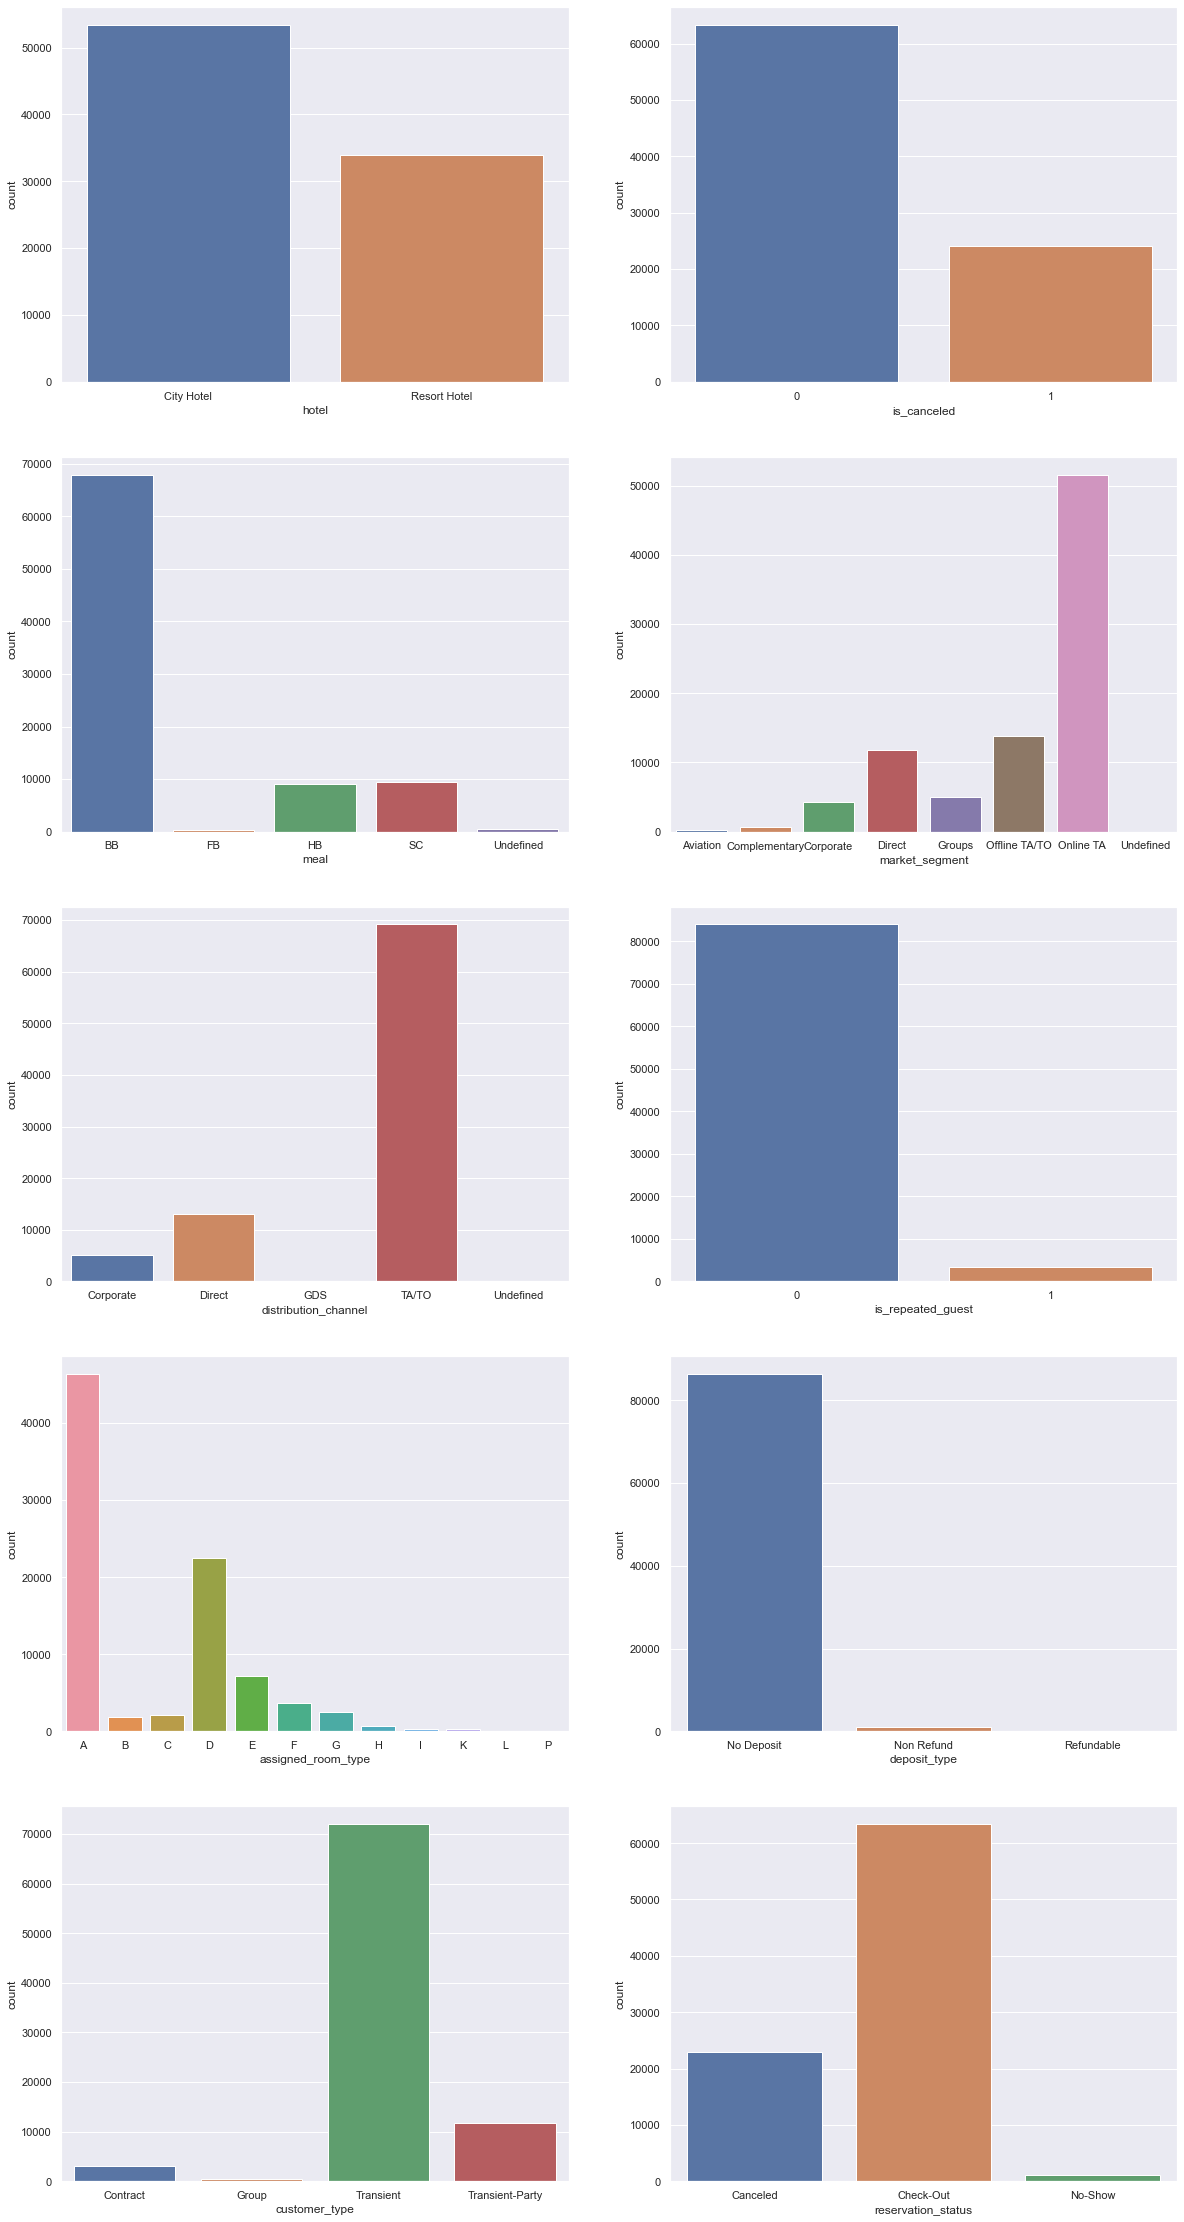

In [12]:
categorical = hb.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(5, 2, figsize=(20, 40))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hb[variable], ax=subplot)

In [13]:
print(hb.hotel.value_counts())
print(hb.is_canceled.value_counts())
print(hb.meal.value_counts())
print(hb.market_segment.value_counts())
print(hb.distribution_channel.value_counts())
print(hb.is_repeated_guest.value_counts())
print(hb.assigned_room_type.value_counts())
print(hb.deposit_type.value_counts())
print(hb.customer_type.value_counts())
hb.reservation_status.value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64
0    63371
1    24025
Name: is_canceled, dtype: int64
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64
0    83981
1     3415
Name: is_repeated_guest, dtype: int64
A    46313
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      706
I      357
K      276
P        6
L        1
Name: assigned_room_type, dtype: int64
No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64
Transient          71986
Transient-Party    11727
Contract            3139
Gr

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

# Numerical Variables

In [14]:
hb.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.030413,0.183990,0.271603,94.138306,0.749565,106.099513,0.698567
std,86.052325,0.686102,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.369145,1.731894,0.727245,113.188172,10.015731,55.009810,0.831946
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.000000,0.000000
25%,11.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000
50%,49.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.000000,0.000000
75%,125.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.000000,1.000000
max,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,5.000000


In [15]:
hb.mode(numeric_only=True)

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests
0,0,2016,17,0,1,2,0,0,0,0,0,9.0,0,0,0


## Arrival Date

In [16]:
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('January','01')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('February','02')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('March','03')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('April','04')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('May','05')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('June','06')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('July','07')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('August','08')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('September','09')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('October','10')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('November','11')
hb['arrival_date_month']=hb['arrival_date_month'].str.replace('December','12')
hb.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,07,1,0,0,2,0,...,C,3,No Deposit,NaN,0,Transient,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,07,1,0,0,2,0,...,C,4,No Deposit,NaN,0,Transient,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,07,1,0,1,1,0,...,C,0,No Deposit,NaN,0,Transient,75,0,Check-Out,2015-07-02


In [17]:
hb['dateInt']=hb['arrival_date_year'].astype(str) + hb['arrival_date_month'].astype(str).str.zfill(2)+ hb['arrival_date_day_of_month'].astype(str).str.zfill(2)
hb['arrival_date'] = pd.to_datetime(hb['dateInt'], format='%Y%m%d')
hb.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,dateInt,arrival_date
0,Resort Hotel,0,342,2015,07,1,0,0,2,0,...,No Deposit,NaN,0,Transient,0,0,Check-Out,2015-07-01,20150701,2015-07-01
1,Resort Hotel,0,737,2015,07,1,0,0,2,0,...,No Deposit,NaN,0,Transient,0,0,Check-Out,2015-07-01,20150701,2015-07-01
2,Resort Hotel,0,7,2015,07,1,0,1,1,0,...,No Deposit,NaN,0,Transient,75,0,Check-Out,2015-07-02,20150701,2015-07-01


In [ ]:
hb.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month','dateInt'], axis=1,inplace=True)

## Noise in Total Days

In [20]:
hb['total_days'] = hb['stays_in_weekend_nights'] + hb['stays_in_week_nights']

In [21]:
hb.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,total_days
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,1.005263,2.625395,1.875795,0.138633,0.010824,0.030413,0.183990,0.271603,94.138306,0.749565,106.099513,0.698567,3.630658
std,86.052325,1.031921,2.053584,0.626500,0.455871,0.113597,0.369145,1.731894,0.727245,113.188172,10.015731,55.009810,0.831946,2.763449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,2.000000
50%,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.000000,0.000000,3.000000
75%,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.000000,1.000000,5.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,5.000000,69.000000


In [22]:
hb.drop(hb[hb['total_days']==0].index,inplace=True)

## Noise in Total Guest

In [23]:
hb['total_guest'] = hb['adults'] + hb['children']+hb['babies']

In [24]:
hb.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,total_days,total_guest
count,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000,74751.000000,86745.000000,86745.000000,86745.000000,86745.000000,86745.000000
mean,80.265053,1.012808,2.645098,1.878206,0.139132,0.010848,0.030549,0.184322,0.271312,93.895988,0.754061,106.895763,0.699867,3.657905,2.028186
std,86.072566,1.032091,2.048595,0.625349,0.456639,0.113771,0.370339,1.736365,0.726801,113.125678,10.047609,54.439623,0.832532,2.755774,0.793401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.000000,0.000000,1.000000,0.000000
25%,12.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,2.000000,2.000000
50%,50.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,99.000000,0.000000,3.000000,2.000000
75%,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.000000,1.000000,5.000000,2.000000
max,709.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,5.000000,69.000000,55.000000


In [26]:
hb.drop(hb[hb['total_guest']==0].index,inplace=True)
hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86639 entries, 2 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86639 non-null  category      
 1   is_canceled                     86639 non-null  category      
 2   lead_time                       86639 non-null  int64         
 3   stays_in_weekend_nights         86639 non-null  int64         
 4   stays_in_week_nights            86639 non-null  int64         
 5   adults                          86639 non-null  int64         
 6   children                        86639 non-null  int32         
 7   babies                          86639 non-null  int64         
 8   meal                            86639 non-null  category      
 9   country                         86197 non-null  object        
 10  market_segment                  86639 non-null  category      
 11  d

## adr
assuming data with adr<=0 as noise

In [27]:
print(hb.shape)
hb.describe()

(86639, 28)


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,total_days,total_guest
count,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000,74681.000000,86639.000000,86639.000000,86639.000000,86639.000000,86639.000000
mean,80.293090,1.011461,2.641824,1.880504,0.139302,0.010861,0.030564,0.184409,0.268170,93.927759,0.750251,107.004986,0.700181,3.653285,2.030667
std,86.073687,1.027539,2.035192,0.622269,0.456893,0.113840,0.370535,1.737150,0.709928,113.132896,10.029423,54.365737,0.832659,2.735811,0.790706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.000000,0.000000,1.000000,1.000000
25%,12.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,2.000000,2.000000
50%,50.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,99.000000,0.000000,3.000000,2.000000
75%,126.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.000000,1.000000,5.000000,2.000000
max,709.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,5.000000,69.000000,55.000000


In [28]:
hb.drop(hb[hb['adr']<=0].index,inplace=True)
hb.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,total_days,total_guest
count,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000,74281.000000,85584.000000,85584.000000,85584.000000,85584.000000,85584.000000
mean,80.719597,1.016861,2.652342,1.881403,0.140061,0.010761,0.028966,0.168723,0.265178,93.936875,0.741716,108.324114,0.700026,3.669202,2.032226
std,85.933923,1.025462,2.029760,0.501662,0.458049,0.113530,0.364830,1.675564,0.701776,113.109974,10.000834,53.377571,0.830954,2.726364,0.700596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,12.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,74.000000,0.000000,2.000000,2.000000
50%,50.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,99.000000,0.000000,3.000000,2.000000
75%,126.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,135.000000,1.000000,5.000000,2.000000
max,709.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,5.000000,69.000000,12.000000


In [29]:
print(74-1.5*(135-74))
print(135+1.5*(135-74))

-17.5
226.5


- Upper extreme for adr is 226.5

## Checking correlation

In [30]:
hb2=hb.copy()

In [31]:
hb2['hotel'] = hb2['hotel'].astype('str')
hb2['is_canceled'] = hb2['is_canceled'].astype('str')
hb2['meal'] = hb2['meal'].astype('str')
hb2['market_segment'] = hb2['market_segment'].astype('str')
hb2['distribution_channel'] = hb2['distribution_channel'].astype('str')
hb2['is_repeated_guest'] = hb2['is_repeated_guest'].astype('str')
hb2['assigned_room_type'] = hb2['assigned_room_type'].astype('str')
hb2['deposit_type'] = hb2['deposit_type'].astype('str')
hb2['customer_type'] = hb2['customer_type'].astype('str')
hb2['reservation_status'] = hb2['reservation_status'].astype('str')

In [32]:
hb2['hotel']=hb2['hotel'].str.replace('City Hotel','1')
hb2['hotel']=hb2['hotel'].str.replace('Resort Hotel','2')
hb2['meal']=hb2['meal'].str.replace('BB','1')
hb2['meal']=hb2['meal'].str.replace('SC','2')
hb2['meal']=hb2['meal'].str.replace('HB','3')
hb2['meal']=hb2['meal'].str.replace('Undefined','4')
hb2['meal']=hb2['meal'].str.replace('FB','5')
hb2['distribution_channel']=hb2['distribution_channel'].str.replace('TA/TO','1')
hb2['distribution_channel']=hb2['distribution_channel'].str.replace('Direct','2')
hb2['distribution_channel']=hb2['distribution_channel'].str.replace('Corporate','3')
hb2['distribution_channel']=hb2['distribution_channel'].str.replace('GDS','4')
hb2['distribution_channel']=hb2['distribution_channel'].str.replace('Undefined','5')
hb2['is_canceled']=hb2['is_canceled'].str.replace('0','2')
hb2['is_repeated_guest']=hb2['is_repeated_guest'].str.replace('0','2')
hb2['market_segment']=hb2['market_segment'].str.replace('Online TA','1')
hb2['market_segment']=hb2['market_segment'].str.replace('Offline TA/TO','2')
hb2['market_segment']=hb2['market_segment'].str.replace('Direct','3')
hb2['market_segment']=hb2['market_segment'].str.replace('Corporate','4')
hb2['market_segment']=hb2['market_segment'].str.replace('Complementary','5')
hb2['market_segment']=hb2['market_segment'].str.replace('Aviation','6')
hb2['market_segment']=hb2['market_segment'].str.replace('Undefined','7')
hb2['market_segment']=hb2['market_segment'].str.replace('Groups','8')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('A','1')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('B','2')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('C','3')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('D','4')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('E','5')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('F','6')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('G','7')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('H','8')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('I','9')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('J','10')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('K','11')
hb2['assigned_room_type']=hb2['assigned_room_type'].str.replace('L','12')
hb2['deposit_type']=hb2['deposit_type'].str.replace('No Deposit','1')
hb2['deposit_type']=hb2['deposit_type'].str.replace('Non Refund','2')
hb2['deposit_type']=hb2['deposit_type'].str.replace('Refundable','3')
hb2['reservation_status']=hb2['reservation_status'].str.replace('Check-Out','1')
hb2['reservation_status']=hb2['reservation_status'].str.replace('Canceled','2')
hb2['reservation_status']=hb2['reservation_status'].str.replace('No-Show','3')

In [33]:
hb2['customer_type']=hb2['customer_type'].str.replace('Transient','1')
hb2['customer_type']=hb2['customer_type'].str.replace('Contract','3')
hb2['customer_type']=hb2['customer_type'].str.replace('Group','4')

In [34]:
hb2.customer_type.unique()

array(['1', '3', '1-Party', '4'], dtype=object)

In [35]:
hb2['customer_type']=hb2['customer_type'].str.replace('1-Party','2')

In [36]:
hb2['hotel'] = hb2['hotel'].astype('int')
hb2['is_canceled'] = hb2['is_canceled'].astype('int')
hb2['meal'] = hb2['meal'].astype('int')
hb2['market_segment'] = hb2['market_segment'].astype('int')
hb2['distribution_channel'] = hb2['distribution_channel'].astype('int')
hb2['is_repeated_guest'] = hb2['is_repeated_guest'].astype('int')
hb2['assigned_room_type'] = hb2['assigned_room_type'].astype('int')
hb2['deposit_type'] = hb2['deposit_type'].astype('int')
hb2['reservation_status'] = hb2['reservation_status'].astype('int')
hb2['customer_type'] = hb2['customer_type'].astype('int')

In [37]:
hb2.corr()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,total_days,total_guest
hotel,1.000000,0.072964,0.030376,0.166508,0.222039,-0.019638,0.018630,0.040124,0.118961,0.106789,...,0.045467,-0.020203,0.834690,-0.035985,0.052476,-0.110849,-0.016635,-0.074773,0.227935,0.004621
is_canceled,0.072964,1.000000,-0.182769,-0.056785,-0.079525,-0.082572,-0.067152,0.020557,-0.018074,0.103852,...,0.092318,-0.137532,0.043330,-0.004960,0.119472,-0.117625,0.122393,-0.975522,-0.080564,-0.099698
lead_time,0.030376,-0.182769,1.000000,0.232178,0.310068,0.145379,0.028351,-0.002654,0.101234,0.078144,...,0.080642,0.156177,0.022942,0.130986,0.125576,0.004092,0.037500,0.163680,0.318173,0.122204
stays_in_weekend_nights,0.166508,-0.056785,0.232178,1.000000,0.543268,0.104416,0.028033,0.015202,0.116061,-0.050849,...,0.026033,-0.027431,0.130700,-0.033128,0.053296,0.016916,0.034032,0.056291,0.780588,0.095559
stays_in_week_nights,0.222039,-0.079525,0.310068,0.543268,1.000000,0.114846,0.029577,0.017300,0.137008,-0.046583,...,0.056880,-0.026678,0.170858,0.000372,0.081909,0.028123,0.038889,0.077012,0.948832,0.104376
adults,-0.019638,-0.082572,0.145379,0.104416,0.114846,1.000000,0.027287,0.019742,0.049549,-0.222814,...,-0.041203,-0.031790,-0.043244,-0.016216,-0.096743,0.305303,0.145427,0.069667,0.124776,0.737090
children,0.018630,-0.067152,0.028351,0.028033,0.029577,0.027287,1.000000,0.016179,-0.004324,-0.090226,...,0.034689,-0.030667,0.028066,-0.020296,-0.062525,0.335400,0.044077,0.062924,0.032563,0.675960
babies,0.040124,0.020557,-0.002654,0.015202,0.017300,0.019742,0.016179,1.000000,0.031113,-0.000207,...,0.086494,-0.010662,0.035483,-0.006732,-0.007103,0.025848,0.093795,-0.019823,0.018598,0.186762
meal,0.118961,-0.018074,0.101234,0.116061,0.137008,0.049549,-0.004324,0.031113,1.000000,0.040257,...,0.064322,-0.005412,0.086794,0.022977,0.052227,0.142638,0.001665,0.014299,0.145656,0.037694
market_segment,0.106789,0.103852,0.078144,-0.050849,-0.046583,-0.222814,-0.090226,-0.000207,0.040257,1.000000,...,0.149509,0.264171,0.086387,0.132091,0.276826,-0.204169,-0.252972,-0.096350,-0.053807,-0.218569


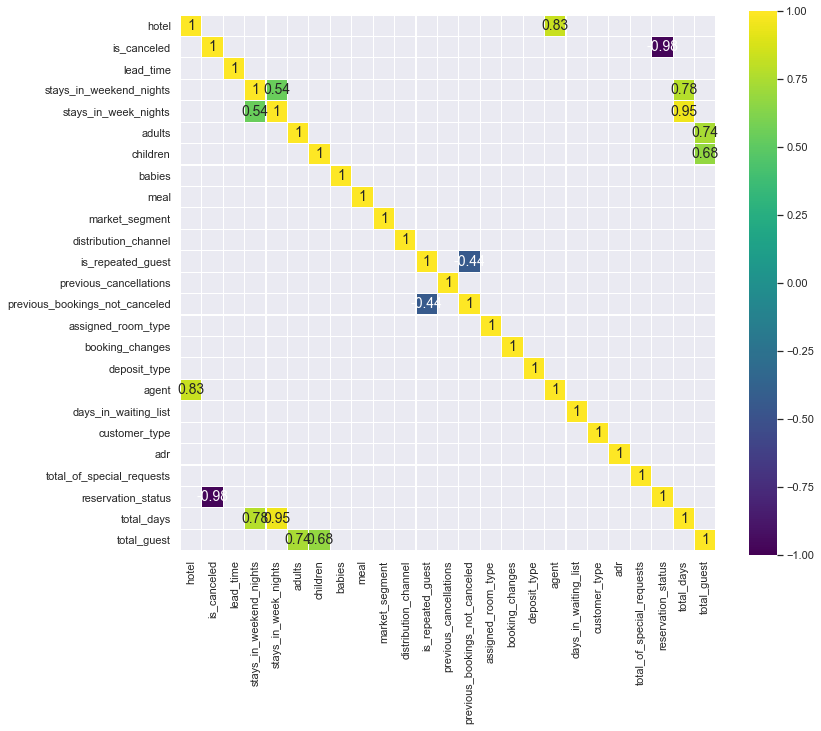

In [38]:
corr2 = hb2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Save Cleaned Data

In [40]:
hb.to_csv("data/HotelBookingDemand_cleaned.csv", encoding='utf8')